In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#Import reference LAI data
lai = pd.read_csv('./data/compiled_data_formodel.csv')
lai.head()

,stakes,northing,easting,zones,aspect,slope,watershed,SYear,maxDepth,Stake_ID,...,DIST_M,DBH_IN,DBH_CM,DIST_FT_SD,DIST_M_SD,DBH_IN_SD,DBH_CM_SD,n,prop_Coniferous,Co
0,S200,464819.0,5262240.0,Upland,193.3626,6.632267,S2,2023,70.0,S200,...,5.35432,8.261155,20.983333,4.232415,1.290040,3.001851,7.624701,12,0.000000,7
1,S200,464819.0,5262240.0,Upland,193.3626,6.632267,S2,2024,22.0,S200,...,5.35432,8.261155,20.983333,4.232415,1.290040,3.001851,7.624701,12,0.000000,7
2,S201,464819.0,5262292.0,Upland,115.0966,3.120716,S2,2023,59.0,S201,...,4.48056,9.534121,24.216667,5.262967,1.604152,4.554940,11.569547,18,0.111111,9
3,S201,464819.0,5262292.0,Upland,115.0966,3.120716,S2,2024,18.0,S201,...,4.48056,9.534121,24.216667,5.262967,1.604152,4.554940,11.569547,18,0.111111,9
4,S203,464819.0,5262396.0,Upland,135.0012,7.452870,S2,2023,49.0,S203,...,5.02539,5.725886,14.543750,6.042944,1.841889,1.568753,3.984632,16,0.437500,11


In [32]:
index = 0
mergedData = pd.DataFrame(columns = list(lai.columns) + ['UnionMean', 'UnionSD', 'TotalMean', 'TotalSD', 'OverlapMean', 'OverlapSD'])

In [33]:
for index in range(0, 100):
    #Import data one site at a time
    load_path = './modeloutput/rhino-data/canopyUnion-site-' + str(index) + '.txt'
    load_path_total = './modeloutput/rhino-data/canopyTotal-site-' + str(index) + '.txt'
    dat = pd.read_csv(load_path, header = None, 
                    names = ['Values'])
    datTot = pd.read_csv(load_path_total, header = None, 
                    names = ['Values'])
   
    #Get differences
    dat['delta'] = np.diff(dat['Values'], append = [0])

    #Sort out peaks
    negs = np.where(dat.delta < 0)[0]
    peaks = []
    totpeaks = []
    overlap = []
    #Take only peask where the union volume could reasonably be calculated
    for neg in negs:
        if(dat.Values[min(neg + 1, len(dat.Values) -1)] != -1):
            peaks.append(dat.Values[neg])
            totpeaks.append(datTot.Values[neg])
            overlap.append(datTot.Values[neg] - dat.Values[neg])

    #Write row
    row = lai.iloc[index]
    row['UnionMean'] = np.nanmean(peaks)
    row['UnionSD'] = np.std(peaks)
    row['TotalMean'] = np.nanmean(totpeaks)
    row['TotalSD'] = np.std(totpeaks)
    row['OverlapMean'] = np.nanmean(overlap)
    row['OverlapSD'] = np.std(overlap)

    #Save
    mergedData.loc[index] = row


C:\Users\marie\AppData\Local\Temp\ipykernel_8752\3299526316.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['UnionMean'] = np.nanmean(peaks)
C:\Users\marie\AppData\Local\Temp\ipykernel_8752\3299526316.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['UnionMean'] = np.nanmean(peaks)
C:\Users\marie\AppData\Local\Temp\ipykernel_8752\3299526316.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['UnionSD'] = np.std(pe

In [34]:
mergedData.head()

,stakes,northing,easting,zones,aspect,slope,watershed,SYear,maxDepth,Stake_ID,...,DBH_CM_SD,n,prop_Coniferous,Co,UnionMean,UnionSD,TotalMean,TotalSD,OverlapMean,OverlapSD
0,S200,464819.0,5262240.0,Upland,193.3626,6.632267,S2,2023,70.0,S200,...,7.624701,12,0.0,7,5.378152,1.213219,5.378152,1.213219,0.0,0.0
1,S200,464819.0,5262240.0,Upland,193.3626,6.632267,S2,2024,22.0,S200,...,7.624701,12,0.0,7,5.63091,1.172271,5.63091,1.172271,0.0,0.0
2,S201,464819.0,5262292.0,Upland,115.0966,3.120716,S2,2023,59.0,S201,...,11.569547,18,0.111111,9,34.116464,24.974351,34.780687,24.822905,0.664223,1.337429
3,S201,464819.0,5262292.0,Upland,115.0966,3.120716,S2,2024,18.0,S201,...,11.569547,18,0.111111,9,35.728379,27.771173,36.542468,27.750292,0.814089,1.384663
4,S203,464819.0,5262396.0,Upland,135.0012,7.45287,S2,2023,49.0,S203,...,3.984632,16,0.4375,11,38.300303,10.151985,41.322589,10.533758,3.022286,2.658763


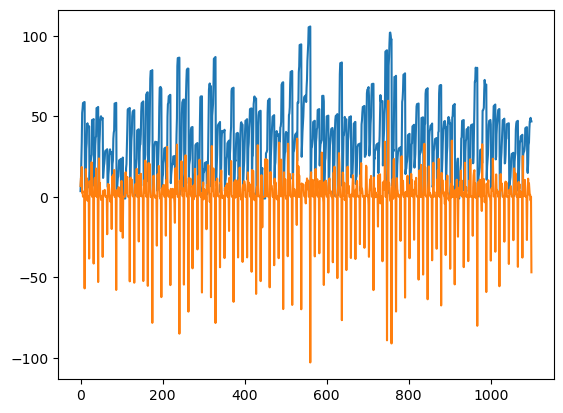

In [35]:
plt.plot(dat.Values)
plt.plot(dat.delta)

In [36]:
#ExportData
mergedData.to_csv('./modeloutput/rhino-data/processedData.csv', index = False)